In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# get the stock quote

df = web.DataReader('TTM', data_source='yahoo', start='2012-01-01', end='2021-3-1')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,18.320000,17.820000,17.820000,18.110001,1919900.0,17.598066
2012-01-04,19.000000,18.440001,18.440001,18.790001,2907600.0,18.258844
2012-01-05,19.180000,18.700001,18.790001,19.100000,1765300.0,18.560080
2012-01-06,19.180000,18.889999,19.080000,19.049999,1877900.0,18.511492
2012-01-09,19.150000,18.760000,18.820000,19.129999,1216100.0,18.589231
...,...,...,...,...,...,...
2021-02-23,22.100000,21.280001,22.059999,21.930000,2693800.0,21.930000
2021-02-24,22.160000,21.700001,21.770000,22.129999,1619200.0,22.129999
2021-02-25,22.959999,21.889999,22.740000,22.120001,2473900.0,22.120001


In [136]:
# get no. of rows and columns
df.shape

(2304, 6)

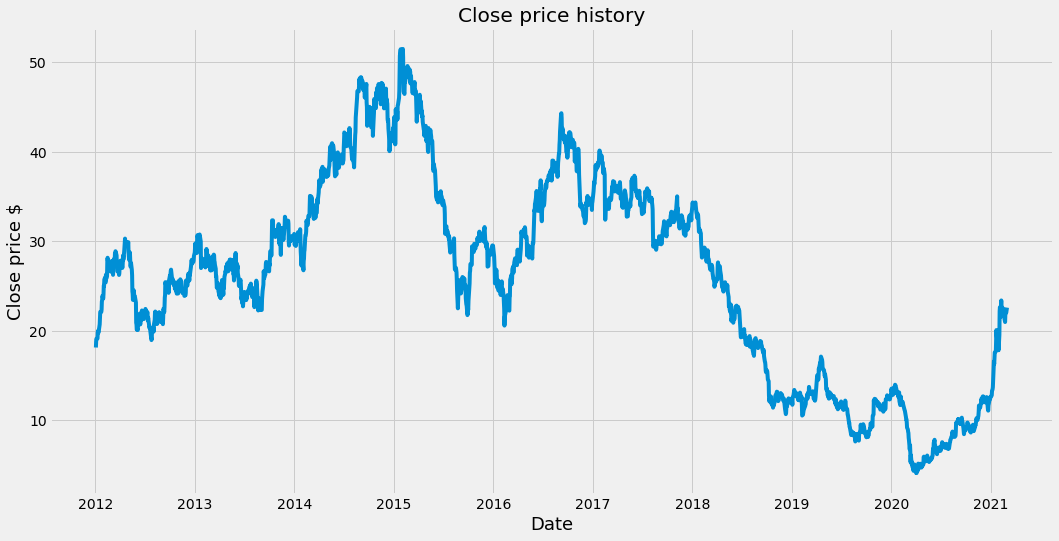

In [137]:
# visualize data -  closing price

plt.figure(figsize=(16, 8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price $', fontsize =18)
plt.show()

In [145]:
# create new dataframe with only close column

data = df.filter(['Close'])

# convert dataframe to numpy array
dataset = data.values

In [146]:
# calculate the length of training data

training_data_len = math.ceil(len(dataset) * 0.8)  

In [147]:
(training_data_len)

1844

In [148]:
# scale data

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.29605403],
       [0.31040305],
       [0.3169445 ],
       ...,
       [0.38067104],
       [0.37792782],
       [0.39016669]])

In [149]:
# create training dataset

# create the scaled training dataset

train_data = scaled_data[0: training_data_len, :]

#split data into x_train and y_train

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.29605403, 0.31040305, 0.3169445 , 0.31588941, 0.31757752,
       0.33340365, 0.3355138 , 0.33087149, 0.33213757, 0.35070691,
       0.36885417, 0.38003798, 0.37940492, 0.38003798, 0.38573539,
       0.40472673, 0.40768093, 0.41780964, 0.4114792 , 0.42202995,
       0.44228741, 0.44102129, 0.4562144 , 0.46127875, 0.45051698,
       0.4496729 , 0.4678202 , 0.45832451, 0.46528801, 0.50052751,
       0.50770202, 0.50116057, 0.49968347, 0.49546315, 0.49778433,
       0.4874446 , 0.49124288, 0.4747837 , 0.49862837, 0.48997676,
       0.49947245, 0.4918759 , 0.49060982, 0.46739816, 0.48470139,
       0.493353  , 0.50453681, 0.49989449, 0.51761975, 0.51867481,
       0.52310615, 0.52120701, 0.51318842, 0.48913272, 0.49525213,
       0.47541676, 0.47604978, 0.47858197, 0.47520574, 0.46718714])]
[0.4703524014661671]

[array([0.29605403, 0.31040305, 0.3169445 , 0.31588941, 0.31757752,
       0.33340365, 0.3355138 , 0.33087149, 0.33213757, 0.35070691,
       0.36885417, 0.38003798, 0.379

In [150]:
# convert x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)

In [151]:
# reshape x_train

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [152]:
# build the LSTM model

model = Sequential()

model.add(LSTM(100, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))

model.add(Dense(25))
model.add(Dense(1))


In [153]:
# compile model

model.compile(optimizer='adam', loss='mean_squared_error')

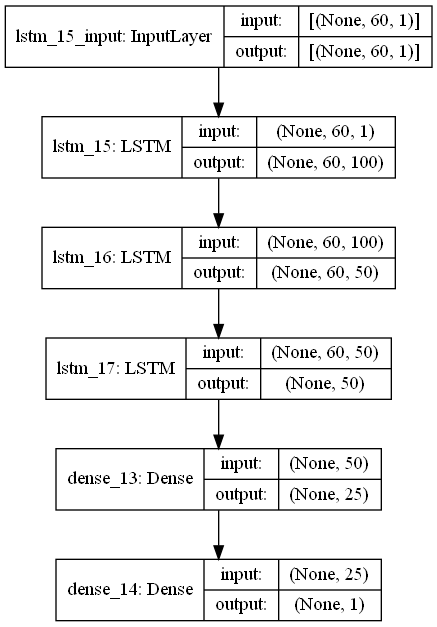

In [154]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [155]:
# train/fit the model

model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1784/1784 [==============================] - 42s 20ms/step - loss: 0.0072
Epoch 2/10
1784/1784 [==============================] - 38s 22ms/step - loss: 0.0011
Epoch 3/10
1784/1784 [==============================] - 37s 21ms/step - loss: 8.4401e-04
Epoch 4/10
1784/1784 [==============================] - 33s 18ms/step - loss: 5.0808e-04
Epoch 5/10
1784/1784 [==============================] - 33s 18ms/step - loss: 6.2114e-04
Epoch 6/10
1784/1784 [==============================] - 33s 19ms/step - loss: 4.5482e-04
Epoch 7/10
1784/1784 [==============================] - 33s 19ms/step - loss: 4.8463e-04
Epoch 8/10
1784/1784 [==============================] - 32s 18ms/step - loss: 4.3499e-04
Epoch 9/10
1784/1784 [==============================] - 33s 18ms/step - loss: 4.2540e-04
Epoch 10/10
1784/1784 [==============================] - 33s 18ms/step - loss: 5.0480e-04


In [156]:
# create testing dataset

# create new array containing scaled values from 1543 to 2003

test_data = scaled_data[training_data_len - 60:, :]

# create datasets x_test and y_test

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])


In [157]:
# convert dataset to numpy array

x_test = np.array(x_test)

In [158]:
#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [159]:
#get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [160]:
# get the root mean squared error for checking accuracy of model

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.8263109248617422

<ipython-input-161-bfe361a68a2c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


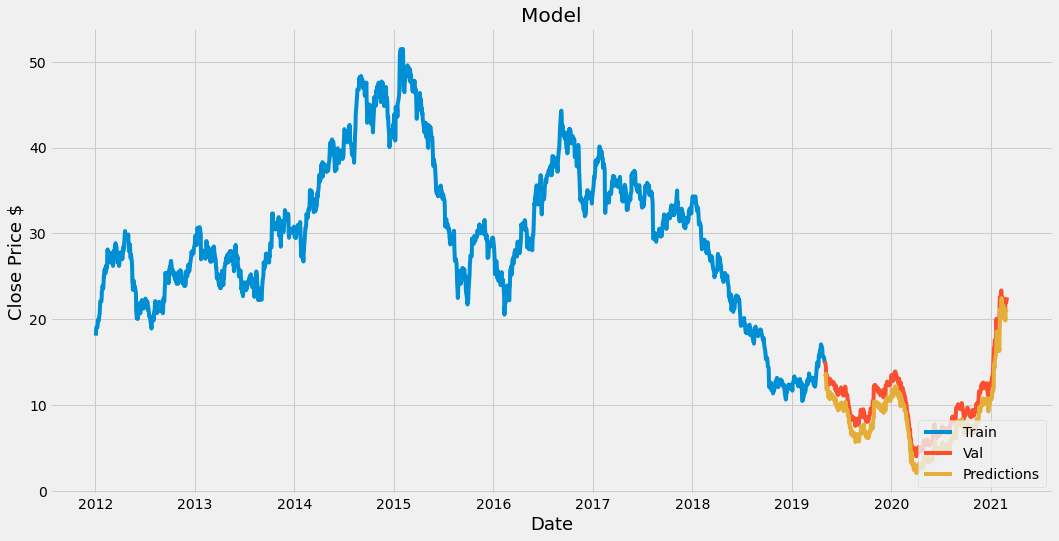

In [161]:
# plot data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

In [162]:
# show valid and predicted price

valid

,Close,Predictions
Date,,
2019-05-03,15.130000,13.352465
2019-05-06,14.550000,13.659245
2019-05-07,13.580000,12.927745
2019-05-08,13.410000,11.890967
2019-05-09,13.360000,11.883493
...,...,...
2021-02-23,21.930000,19.871876
2021-02-24,22.129999,21.081917
2021-02-25,22.120001,21.103235


In [165]:
# get the quote

apple_quote = web.DataReader('TTM', data_source = 'yahoo', start='2012-01-01',  end = '2021-3-26') 

#create new dataframe

new_df = apple_quote.filter(['Close'])

#get last 60 days closing price value and covert to dataframe

last_60_days = new_df[-60:].values

#scale the data to be values between 0 and 1

last_60_days_scaled = scaler.transform(last_60_days)

#create an empty list

X_test = []

#append the past 60 days

X_test.append(last_60_days_scaled)

# convert the X_test data set to np array

X_test = np.array(X_test)

# Reshape

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get predicted scale price

pred_price = model.predict(X_test)

# undo scaling

pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[21.6035]]


In [166]:

apple_quote2 = web.DataReader('TTM', data_source = 'yahoo', start='2021-3-1',  end = '2021-3-26') 
print(apple_quote2['Close'])

Date
2021-03-01    22.57
Name: Close, dtype: float64
